### Load data from tree permit file

https://data.austintexas.gov/Building-and-Development/Issued-Tree-Permits/ac2h-ha3r

In [5]:
import requests
import csv
from datetime import datetime

def fetch_data(start_date, end_date, limit=1000):
    base_url = "https://data.austintexas.gov/resource/ac2h-ha3r.json"
    offset = 0
    all_records = []

    # Formatting the dates for the API query
    start_date_str = start_date.strftime('%Y-%m-%dT%H:%M:%S')
    end_date_str = end_date.strftime('%Y-%m-%dT%H:%M:%S')

    while True:
        params = {
            "$limit": limit,
            "$offset": offset,
            "$where": f"issued_date BETWEEN '{start_date_str}' AND '{end_date_str}'"  # Replace 'date_column' with the actual date field name
        }
        response = requests.get(base_url, params=params)

        if response.status_code != 200:
            print(f"Error: {response.status_code}")
            break

        records = response.json()

        if not records:
            # No more records to fetch
            break

        all_records.extend(records)
        offset += limit
        print(f"Fetched {len(records)} records, total so far: {len(all_records)}")

    return all_records

def save_to_csv(records, filename):
    if not records:
        print("No records to save.")
        return

    keys = records[0].keys()
    
    with open(filename, mode='w', newline='', encoding='utf-8') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=keys)
        writer.writeheader()
        writer.writerows(records)
    
    print(f"Saved {len(records)} records to {filename}")


    # Define your date range
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 12, 31)

data = fetch_data(start_date, end_date)
save_to_csv(data, 'Issued_Tree_Permits.csv')

Fetched 1000 records, total so far: 1000
Fetched 1000 records, total so far: 2000
Fetched 1000 records, total so far: 3000
Fetched 1000 records, total so far: 4000
Fetched 1000 records, total so far: 5000
Fetched 964 records, total so far: 5964
Saved 5964 records to Issued_Tree_Permits.csv


In [9]:
import pandas as pd
tree_permits_df = pd.read_csv('Issued_Tree_Permits.csv', sep=',', index_col='permit_number',dtype={'species':str, 'trunk_diameter':str } )
display(tree_permits_df.head())
print('Total number of records: ',len(tree_permits_df))

,project_id,permit_class,permit_address,property_id,issued_date,expires_date,permit_status,application_type,fee_required,heritage_tree,...,propx,propy,latitude,longitude,council_district,jurisdiction,link_to_details,appendix_f_removed,non_appendix_f_removed,mitigation
permit_number,,,,,,,,,,,,,,,,,,,,,
2022-122125 TP,13072711,Residential,3009 BOWMAN AVE,617684,2023-01-02T00:00:00.000,2023-11-01T00:00:00.000,Active,Development Related,True,True,...,3105028.0,10081946.0,30.299424,-97.771394,10.0,AUSTIN FULL PURPOSE,{'url': 'https://abc.austintexas.gov/web/permi...,0.0,0.0,0.0
2022-122111 TP,13071257,Residential,3101 LYONS RD,108164,2023-01-03T00:00:00.000,2024-02-02T00:00:00.000,Final,Development Related,True,True,...,3126340.0,10069044.0,30.262591,-97.704848,3.0,AUSTIN FULL PURPOSE,{'url': 'https://abc.austintexas.gov/web/permi...,0.0,0.0,0.0
2022-122044 TP,13068520,Residential,4608 PALISADE DR,264868,2023-01-03T00:00:00.000,2023-03-02T00:00:00.000,Final,Development Related,True,True,...,3101807.0,10096968.0,30.340921,-97.780506,10.0,AUSTIN FULL PURPOSE,{'url': 'https://abc.austintexas.gov/web/permi...,0.0,0.0,0.0
2022-121797 TP,13047522,Residential,4100 MC BRINE PL,120235,2023-01-03T00:00:00.000,2024-08-30T00:00:00.000,Final,Development Related,True,True,...,3102166.0,10089226.0,30.319616,-97.779931,8.0,AUSTIN LTD,{'url': 'https://abc.austintexas.gov/web/permi...,0.0,0.0,0.0
2023-122126 TP,13073129,Residential,5605 WESTMINSTER DR,142052,2023-01-03T00:00:00.000,2023-06-12T00:00:00.000,Final,Development Related,True,True,...,3130575.0,10086112.0,30.309232,-97.690153,4.0,AUSTIN FULL PURPOSE,{'url': 'https://abc.austintexas.gov/web/permi...,0.0,0.0,0.0


Total number of records:  5964


### Get null values

In [11]:
nulls = tree_permits_df.isnull().sum()

print('Number null species rows:', nulls['species'])
print('Number null trunk diameter rows:', nulls['trunk_diameter'])


Number null species rows: 11
Number null trunk diameter rows: 11


### Remove null values

In [12]:
tree_permits_df.dropna(axis=0, subset=['species', 'trunk_diameter'], inplace=True)

print('Number of records after null drop', len(tree_permits_df))

Number of records after null drop 5953


### Handling bad trunk diameter values


In [13]:
import re
# removing non numeric characters
non_decimal = re.compile(r'[^\d.,]+')
converter = lambda x: non_decimal.sub('',x)

tree_permits_df['trunk_diameter'] = tree_permits_df['trunk_diameter'].apply(converter)


### Get rows with multiple species

In [14]:

# find rows with multiple species
multiple_species = tree_permits_df['species'].astype('str').apply(lambda x: x.find(',') !=-1)
# find rows with multiple diameters
multiple_diams = tree_permits_df['trunk_diameter'].astype('str').apply(lambda x: x.find(',') !=-1)

#get combined index of rows with multiple species or diameters
multiple_index = set(multiple_diams[multiple_diams==True].index.values).union(set(multiple_species[multiple_species==True].index.values))

# get the subset of rows with multiple species or diameters
multiple_df = tree_permits_df.loc[multiple_index].copy()

print('Number of multiple tree records: ',len(multiple_df))

multiple_df.head().T

Number of multiple tree records:  2613


C:\Users\user\AppData\Local\Temp\ipykernel_1560\2803266527.py:10: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  multiple_df = tree_permits_df.loc[multiple_index].copy()


permit_number,2023-123863 TP,2022-121939 TP,2024-105546 TP,2023-122589 TP,2024-124940 TP
project_id,13242502,13057494,13379623,13116449,13354249
permit_class,Residential,Residential,Residential,Residential,Residential
permit_address,917 E 37TH ST,2512 WOOLDRIDGE DR,4510 PACK SADDLE PASS,2201 GARDEN ST,5010 SHOAL CREEK BLVD
property_id,253495,431066,116438,3086774,885404
issued_date,2023-11-29T00:00:00.000,2023-08-31T00:00:00.000,2024-09-05T00:00:00.000,2023-05-23T00:00:00.000,2024-07-03T00:00:00.000
expires_date,2024-09-18T00:00:00.000,2025-08-31T00:00:00.000,2025-09-05T00:00:00.000,2023-11-19T00:00:00.000,2024-12-31T00:00:00.000
permit_status,Final,Active,Active,Active,Active
application_type,Development Related,Development Related,Non-Development Related,Development Related,Development Related
fee_required,True,True,False,True,True
heritage_tree,True,True,False,True,True


### Converting values to lists for expanding

In [15]:
# convert scv string to list
multiple_df['species'] = multiple_df['species'].str.split(',')
multiple_df['trunk_diameter'] = multiple_df['trunk_diameter'].str.split(',')
multiple_df.head().T

permit_number,2023-123863 TP,2022-121939 TP,2024-105546 TP,2023-122589 TP,2024-124940 TP
project_id,13242502,13057494,13379623,13116449,13354249
permit_class,Residential,Residential,Residential,Residential,Residential
permit_address,917 E 37TH ST,2512 WOOLDRIDGE DR,4510 PACK SADDLE PASS,2201 GARDEN ST,5010 SHOAL CREEK BLVD
property_id,253495,431066,116438,3086774,885404
issued_date,2023-11-29T00:00:00.000,2023-08-31T00:00:00.000,2024-09-05T00:00:00.000,2023-05-23T00:00:00.000,2024-07-03T00:00:00.000
expires_date,2024-09-18T00:00:00.000,2025-08-31T00:00:00.000,2025-09-05T00:00:00.000,2023-11-19T00:00:00.000,2024-12-31T00:00:00.000
permit_status,Final,Active,Active,Active,Active
application_type,Development Related,Development Related,Non-Development Related,Development Related,Development Related
fee_required,True,True,False,True,True
heritage_tree,True,True,False,True,True


### Verify that number of species matches number of trunk diameters

In [16]:
wrong_length = (multiple_df['species'].apply(lambda x: len(x)) != multiple_df['trunk_diameter'].apply(lambda x: len(x)))
wrong_length = wrong_length[wrong_length==True]
print(f'{len(wrong_length)} rows have different length species and diameters')

281 rows have different length species and diameters


### Drop columns that don't have matching species and trunk diameter

In [17]:
multiple_df.drop(index=wrong_length.index, inplace=True)

### Explode columns with multiple values

In [19]:
multiple_df = multiple_df.explode(['species','trunk_diameter'])

print('Number new records', len(multiple_df))

Number new records 8417


In [20]:
multiple_df[['species','trunk_diameter']].head()


,species,trunk_diameter
permit_number,,
2023-123863 TP,Hackberry,
2023-123863 TP,Mesquite,
2023-123863 TP,Pecan,
2023-123863 TP,Pecan,
2022-121939 TP,Pecan,34


### Recombine with original permits

In [21]:
new_permits = tree_permits_df.drop(index=multiple_index).append(multiple_df)

print('Number of rows in new permit file', len(new_permits))

Number of rows in new permit file 11757


C:\Users\user\AppData\Local\Temp\ipykernel_1560\4257519116.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_permits = tree_permits_df.drop(index=multiple_index).append(multiple_df)


### Removing empty string diameter rows

In [22]:
print('Number of rows with empty string trunk diameter', sum(new_permits['trunk_diameter'] == ''))

new_permits = new_permits[new_permits['trunk_diameter'] != '']


Number of rows with empty string trunk diameter 52


### Take care of some extra weird chars and convert diameter to float

In [25]:
new_permits = new_permits[new_permits['trunk_diameter'] != '.']

# Convert trunk_diameter to float with error handling
new_permits['trunk_diameter'] = pd.to_numeric(new_permits['trunk_diameter'].str.strip(), errors='coerce')

# Optional: Handle NaN values
# Fill NaNs with a specific value or drop them
# new_permits['trunk_diameter'].fillna(0, inplace=True)  # Replace NaN with 0
new_permits.dropna(subset=['trunk_diameter'], inplace=True)  # Drop rows with NaN

### Remove diameters outside of acceptable range

Picked range 0<D<100

<AxesSubplot:ylabel='Frequency'>

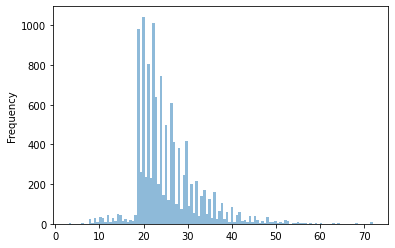

In [27]:
new_permits = new_permits[new_permits['trunk_diameter'] > 0]
new_permits = new_permits[new_permits['trunk_diameter'] < 100]
new_permits['trunk_diameter'].plot.hist(bins=120, alpha=0.5)

### Fixing tree species column

In [28]:
replacements = dict()
# remove stuff between parentheses
replacements[r"\(.*\)"] = ""
# remove numbers
replacements[r"\d+"] = ""
# remove parentheses
replacements[r"\)"] = ""
replacements[r"\("] = ""
# remove extra "
replacements[r'\"'] = ""

species_column = new_permits['species'].copy()

# make replacements, strip trailing and leading . and ' ' and capitalize each word
species_column = species_column.str.title().replace(replacements, regex=True).str.strip('. ').str.strip()

print(sorted(species_column.unique()))
# print('Unique species names' , len(new_permits['SPECIES'].str.title().str.strip().str.replace(r"\(.*\)","").unique()))

['', 'A. Elm', 'A.Elm', 'Afghan Pine', 'Ailanthus', 'America Sycamore', 'American Elm', 'American Elm Ddi', 'American Elm Fair', 'American Elm Removed', 'American Sycamore', 'Anacua', 'And Ashe Juniper', 'Arbor Vitae', 'Arborvitae', 'Arizon Ash', 'Arizona', 'Arizona  Ash', 'Arizona Ash', 'Arizona Ashe', 'Arizona Cypress', 'Ash', 'Ash Juniper', 'Ashe Juniper', 'Back Willow', 'Bad Cypress', 'Bald Cypress', 'Baldcypress', 'Bartlett Pear', 'Beech', 'Black Cherry', 'Black Oak', 'Black Walnut', 'Black Willow', 'Blackhaw', 'Blackjack Oak', 'Bluff Oak', "Bois D'Arc/Osage Orange", 'Box  Elder', 'Box Elder', 'Boxelder', 'Boxelder/ Acer Negundo', 'Bradfor Pear', 'Bradford Pear', 'Bum Gumelia', 'Bur Oak', 'Burr Oak', 'C. Elm', 'Callery Pear', 'Carya Illinoiensis', 'Catalpa', 'Catapla', 'Cedar', 'Cedar Elm', 'Cedar Elm Ddi', 'Cedar Elm Tree', 'Ceder Elm', 'Celtis Occidentalis', 'Cherry', 'China Berry', 'Chinaberry', 'Chinese Elm', 'Chinese Hawthorn', 'Chinese Lace Bark Elm', 'Chinese Parasol', 'Chi

In [29]:
new_permits['species'] = species_column

### Drop Unkown columns

In [30]:
names_to_drop = ['', '-', '?',"All Within ' Of Path",'Unidentified', 
                 'Unknow', 'Unknown', 'Unknown Heritage', 'Unkown', 
                 'Various','Multiple', 'Na']

new_permits = new_permits[~new_permits['species'].isin(names_to_drop)]

len(new_permits)

11691

### Save the results

In [31]:
print('Data set size:',  len(new_permits))
new_permits.to_csv('Issued_Tree_Permits_expanded_cleaned.csv')

Data set size: 11691


### Now we try to map the tree names to trees foin in the i-tree species list

https://www.itreetools.org/support/resources-overview/i-tree-manuals-workbooks

In [32]:
# import data
i_trees = pd.read_csv('iTreeSpeciesList.2021.07.27.csv')
display(i_trees.head())

# get all the common names in the data
common_names = list(i_trees['Common Name'].values)
common_names[:10]


,ID,Code,Scientific Name,Common Name
0,2,FICLASS,Filicopsida,Fern class
1,3,GICLASS,Ginkgoopsida,Ginkgo class
2,4,LICLASS,Liliopsida,Lily class
3,5,MACLASS,Magnoliopsida,Hardwood
4,287,AB1,Abelia,abelia spp


['Fern class',
 'Ginkgo class',
 'Lily class',
 'Hardwood',
 'abelia spp',
 'Indian mallow spp',
 'acacia spp',
 'maple spp',
 'adansonia spp',
 'wild lime spp']

### Create a mapping for tree names

This section tries to fuzzy match the tree name in the permits df to a common tree name in the i-tree list.  If a perfect match is found it uses that, if not it proposes the best 10 options from the fuzzy matching. The user is prompted to select the best option or enter a name manually.  This name should be from the i-tree list.  If the tree is not in the list the user should manually enter na. 

In [23]:
from IPython.display import clear_output
from fuzzywuzzy import process

proposed_names = dict()

for tree_name in new_permits['species'].unique():
    best_guess = process.extractOne(tree_name, common_names)
    proposed_names[tree_name] = (best_guess[0], best_guess[1])
    print(f"The best match for '{tree_name}' is '{best_guess[0]}' which is a {best_guess[1]}% match.")
    if best_guess[1] < 100:
        all_guess = process.extractBests(tree_name, common_names, limit=10)
        i = 0
        s = ''
        for name, score in all_guess:
            s += f'{i}) {name} {score} %\n'
            i +=1
        s += '10) manual entry'
        print(f'choose next best guess for {tree_name}:\n{s}', flush=True)
        selection = int(input('make selection'))
        if selection == 10:
            name = input('Enter the correct tree name:')
            proposed_names[tree_name] = (name, 100)
        else:
            proposed_names[tree_name] = (all_guess[selection][0], all_guess[selection][1])
        clear_output(wait=True)
    

The best match for 'Cedar Elm' is 'Cedar elm' which is a 100% match.
The best match for 'Live Oak' is 'Live oak' which is a 100% match.
The best match for 'Elm/Live Oak' is 'Live oak' which is a 90% match.
choose next best guess for Elm/Live Oak:
0) Live oak 90 %
1) oak spp 86 %
2) elm spp 86 %
3) Boynton sand post oak 86 %
4) Cape oak 86 %
5) European turkey oak 86 %
6) Blue oak 86 %
7) Coastal sage scrub oak 86 %
8) Dunn oak 86 %
9) Bear oak 86 %
10) manual entry


### Create a mapper dictionary from the names proposed in the previous step and map the names to a new column in the new_permits df

In [71]:
tree_name_map = dict()
for k,v in proposed_names.items():
    tree_name_map[k] = v[0]

new_permits['Common Name'] = new_permits['species'].map(tree_name_map)


### Make a table to reflect the mapper and save

In [125]:
species_map = dict()

for k,v in proposed_names.items():
    if v[0] in species_map:
        species_map[v[0]] += [k]
    else:
        species_map[v[0]] = [k]

species_map_df = pd.DataFrame(columns=species_map.keys())
for k, v in species_map.items():
    species_map_df[k] = [v]

species_map_df.to_csv('species_map.csv')
species_map_df = species_map_df.T
species_map_df.index.rename('i-tree names', inplace=True)
species_map_df.columns.rename({0:'i-tree names'}, inplace=True)
species_map_df



TypeError: RangeIndex.name must be a hashable type

### Finally join the new permits df with the i-tree df on the 'Common Name' column we got from the mapping

In [74]:
i_trees.head()
new_permits_coded = pd.merge(new_permits, i_trees, on='Common Name', how='left')


### Save

In [75]:
print('Data set size:',  len(new_permits))
new_permits_coded.to_csv('Issued_Tree_Permits_expanded_cleaned_relabeled.csv')

Data set size: 47678
